# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data 

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

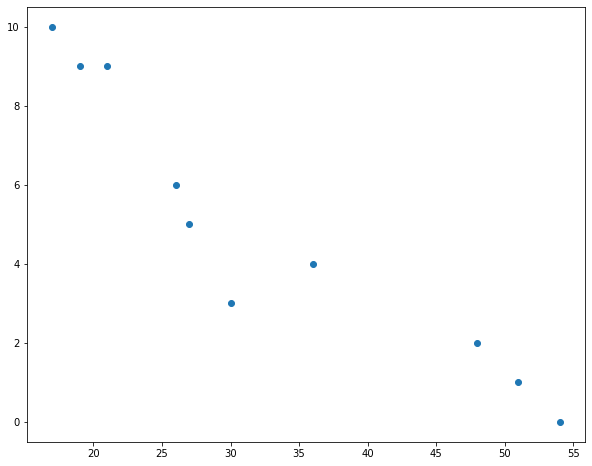

In [2]:
# Your code here.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(student_data['Age'],student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
"""There is a negative correlation going on between the age and the tardies. As the age increases the tardies are
decreasing. Which gives us a hypotheses that aged people are less late to the classes than the young people."""

'There is a negative correlation going on between the age and the tardies. As the age increases the tardies are\ndecreasing. Which gives us a hypotheses that aged people are less late to the classes than the young people.'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# Your response here.
student_covariance = student_data['Age'].cov(student_data['Tardies']) 
print(f"Covariance: {student_covariance}")
student_correlation = student_data['Age'].corr(student_data['Tardies'])
print(f" Correlation: {student_correlation}")

"""After finding out the correlation bewtween these two variable there is a strong negative relation going on with a
value of -0.93. 
The Covariance is giving us how the direction is, they are moving inversely so there is a weak relationship between them."""

Covariance: -45.56666666666666
 Correlation: -0.9391626886887122


'After finding out the correlation bewtween these two variable there is a strong negative relation going on with a\nvalue of -0.93. \nThe Covariance is giving us how the direction is, they are moving inversely so there is a weak relationship between them.'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(student_data['Age'].values.reshape(-1,1), student_data['Tardies'].values.reshape(-1,1))
intercept = model.intercept_[0]
slope = model.coef_[0][0]
print(intercept)
print(slope)
print('\n')

predictions = [intercept + slope*x for x in student_data['Age']]
print(predictions)
print('\n')


residuals = [realvalue - predictedvalue for realvalue, predictedvalue in zip(student_data['Tardies'],predictions)]
print(residuals)

"""In this code I'm using linear regression model, and found out the slope and intercept values to predict the
tardies for the ages. 

From predictions I got a very small differences between original and predicted tardies which gives that original 
tardies are almost correct

Then I found out the residuals and the values are between -2 to 0. The error percentage is also very less, which
indeed tells us the the less the age the more the tardies.

"""

12.888803363135768
-0.2428207709159808


[8.760850257564094, 0.5049440464207464, 6.332642548404286, 7.789567173900171, 4.1472556101604585, 1.23340635916869, 8.275208715732132, 6.575463319320267, -0.2235182663271953, 5.604180235656344]


[1.239149742435906, 0.4950559535792536, -1.3326425484042863, 1.2104328260998294, -0.14725561016045852, 0.7665936408313101, 0.7247912842678677, -0.5754633193202672, 0.2235182663271953, -2.6041802356563437]


"In this code I'm using linear regression model, and found out the slope and intercept values to predict the\ntardies for the ages. \n\nFrom predictions I got a very small differences between original and predicted tardies which gives that original \ntardies are almost correct\n\nThen I found out the residuals and the values are between -2 to 0. The error percentage is also very less, which\nindeed tells us the the less the age the more the tardies.\n\n"

Plot your regression model on your scatter plot.

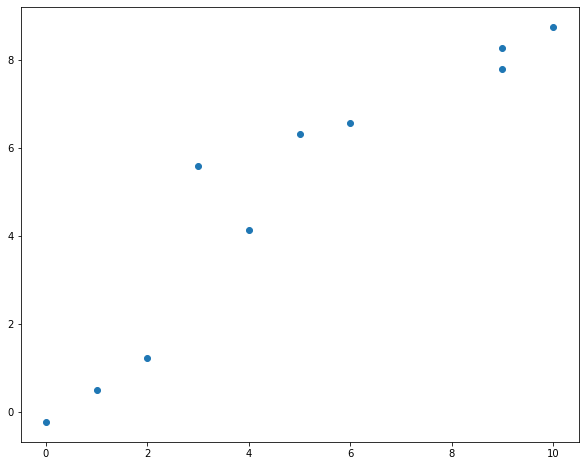

In [14]:
# Your code here.
plt.figure(figsize=(10,8))
plt.scatter(student_data['Tardies'], predictions)
# plt.scatter(student_data['Tardies'], residuals)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
# Your response here. 
import numpy as np
MSE = np.mean([residual**2 for residual in residuals])
print('MSE = ' + str(MSE))
# RMSE = np.sqrt((np.mean([residual**2 for residual in residuals])))
RMSE = np.sqrt(MSE)
print('RMSE = ' + str(RMSE))
student_data['Tardies'].mean()
print(f"Error Percentage: {(RMSE / student_data['Tardies'].mean()) * 100}")

"""From the plot, the predictions and tardies are closely related which is giving a strong relation between them.
The error percentage which I got from the data is 23.5. But from the data I predicted and from the residuals I got 
differences between them with the tardies are very low.
So, I think age is good predictor of tardiness from the dataset.
"""

MSE = 1.3319201847356268
RMSE = 1.1540884648655088
Error Percentage: 23.55282581358181


'From the plot, the predictions and tardies are closely related which is giving a strong relation between them.\nThe error percentage which I got from the data is 23.5. But from the data I predicted and from the residuals I got \ndifferences between them with the tardies are very low.\nSo, I think age is good predictor of tardiness from the dataset.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [16]:
# Import any libraries you may need & the data
import pandas as pd
vehicles = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Regression-Analysis/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
# Your response here. 
vehicles_data_analysis = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile' ]]
vehicles_data_analysis.head(10)
vehicles_data_analysis.corr()

"""The correlation between Fuel Barrels/Year and CO2 Emission Grams/Mile has very strong positive relation, If the production
of fuel barrels increasing in every year the rate of CO2 emissions is also increasing.

The correlation between Combined MPG and CO2 Emission Grams/Mile is having a strong weak relation, The more fuel 
efficient the car is the less it emits the CO2.
"""

'The correlation between Fuel Barrels/Year and CO2 Emission Grams/Mile has very strong positive relation, If the production\nof fuel barrels increasing in every year the rate of CO2 emissions is also increasing.\n\nThe correlation between Combined MPG and CO2 Emission Grams/Mile is having a strong weak relation, The more fuel \nefficient the car is the less it emits the CO2.\n'

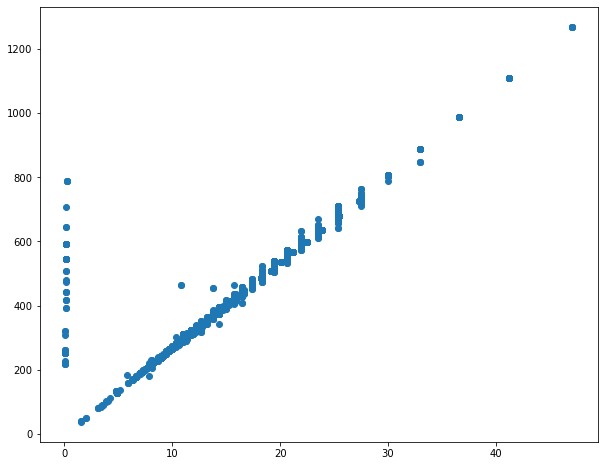

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(vehicles_data_analysis['Fuel Barrels/Year'],vehicles_data_analysis['CO2 Emission Grams/Mile'])

"""For reference, I used this plot to show how they are closely related, we can see from the plot, if the fuel barrels
per year increases in x-axis, the CO2 emission also increasing gradually in y-axis"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here. 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(vehicles_data_analysis['Fuel Barrels/Year'].values.reshape(-1,1), vehicles_data_analysis['CO2 Emission Grams/Mile'].values.reshape(-1,1))
intercept = model.intercept_[0]
slope = model.coef_[0][0]
print(intercept)
print(slope)
print('\n')

predictions = [intercept + slope*x for x in vehicles_data_analysis['Fuel Barrels/Year']]
# print(predictions)
print('\n')


residuals = [realvalue - predictedvalue for realvalue, predictedvalue in zip(vehicles_data_analysis['CO2 Emission Grams/Mile'],predictions)]
# print(residuals)

"""I used the relation between Fuel Barrels/Year and CO2 Emission Grams/Mile to found out the predictions and residuals.
The prediction values are very closely related to the original CO2 Emission Grams/Mile. The residual range is also
to small with the original CO2 Emission Grams/Mile. From these two I got an analysis that the co2 emission and 
fuel barrels are closely related.
"""

12.486520830758195
26.283625397470207


[522.0950953754732, 678.8977336969242, 553.9456312845178, 678.8977336969242, 553.9456312845178, 406.2749647971289, 373.45926113326465, 445.65380919376594, 406.2749647971289, 373.45926113326465, 445.65380919376594, 406.2749647971289, 373.45926113326465, 445.65380919376594, 445.65380919376594, 445.65380919376594, 468.45208752866114, 445.65380919376594, 468.45208752866114, 445.65380919376594, 468.45208752866114, 445.65380919376594, 425.02679546219423, 445.65380919376594, 425.02679546219423, 445.65380919376594, 445.65380919376594, 445.65380919376594, 425.02679546219423, 425.02679546219423, 468.45208752866114, 468.45208752866114, 468.45208752866114, 493.78350790076684, 493.78350790076684, 493.78350790076684, 493.78350790076684, 493.78350790076684, 493.78350790076684, 321.8917268043351, 359.0203515211644, 321.8917268043351, 359.0203515211644, 321.8917268043351, 359.0203515211644, 311.22258177076355, 311.22258177076355, 240.46930417970967, 240.469304179

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [9]:
# Your response here. 
import numpy as np
MSE = np.mean([residual**2 for residual in residuals])
print('MSE = ' + str(MSE))
# RMSE = np.sqrt((np.mean([residual**2 for residual in residuals])))
RMSE = np.sqrt(MSE)
print('RMSE = ' + str(RMSE))
vehicles_data_analysis['CO2 Emission Grams/Mile'].mean()
print(f"Error Percentage: {(RMSE / vehicles_data_analysis['CO2 Emission Grams/Mile'].mean()) * 100}")

"""When finding the correlation with CO2 Emission Grams/Mile and Fuel Barrels/ Year I got a strong positive 
correlation to confirm it I found some predictions and residuals which gave me that they are closely related to
each other and then I find the error percentage which is 4, which can be negligible because the difference is very 
low. 
So, by this I conclude that they both have a positive correlation.
If the fuel barrels increases then the emission of CO2 also increases.
"""

MSE = 388.84951817601683
RMSE = 19.719267688634304
Error Percentage: 4.148661861583093


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 